## S-Mobile: Predicting Customer Churn

* Team-lead GitHub userid: rsm-roguchi
* Group name: Group 2
* Team member names:
    - Ryosuke Oguchi
    - Qiyong Zhang
    - Rachel Wang
    - Jacqueline Vallejo

## Setup

Please complete this python notebook with your group by answering the questions in `s-mobile-msba.pdf`.

Create a Notebook with all your results and comments and push the Notebook to GitHub when your team is done. Make sure to connect the GitHub repo to GradeScope before the due date. All results MUST be reproducible (i.e., the TA and I must be able to recreate your output from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the RSM-MSBA docker container.

> Note: Please do not install any packages as part of your Jupyter Notebook submission

This is a group assignment and you will be using Git and GitHub. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's changes to accept. The team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitHub. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `model1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file
* If you are going to work simultaneously, do it in different notebooks, e.g.,
    - model1.ipynb, question1.ipynb, etc.
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:

![](images/github-group-workflow.png)

In [1]:
import pandas as pd
import pyrsm as rsm

In [2]:
## load the data - this dataset must NOT be changed
s_mobile = pd.read_parquet("data/s_mobile.parquet")

In [3]:
rsm.md("data/s_mobile_description.md")

## S-mobile

Dataset used to investigate opportunities to decrease customer churn at S-mobile. The sample consists of three parts:

1. A training sample with 27,300 observations and a 50% churn rate ("training == 1")
2. A test sample with 11,700 observations and a 50% churn rate ("training == 0")
3. A representative sample with 30,000 observations and a churn rate of 2%, i.e., the actual monthly churn rate for S-mobile ("is.na(training)" or "representative == 1")

## Variables

* customer: Customer ID
* churn: Did consumer churn in the last 30 days? (yes or no)
* changer: % change in revenue over the most recent 4 month period
* changem: % change in minutes of use over the most recent 4 month period
* revenue: Mean monthly revenue in SGD
* mou: Mean monthly minutes of use
* overage: Mean monthly overage minutes
* roam: Mean number of roaming calls
* conference: Mean number of conference calls
* months: # of months the customer has had service with S-Mobile
* uniqsubs: Number of individuals listed on the customer account
* custcare: Mean number of calls to customer care
* retcalls: Number of calls by the customer to the retention team
* dropvce: Mean number of dropped voice calls
* eqpdays: Number of days customer has owned current handset
* refurb: Handset is refurbished (no or yes)
* smartphone: Handset is a smartphone (no or yes)
* creditr: High credit rating as opposed to medium or low (no or yes)
* mcycle: Subscriber owns a motorcycle (no or yes)
* car: Subscriber owns a car (no or yes)
* travel: Subscriber has traveled internationally (no or yes)
* region: Regions delineated by the 5 Community Development Council Districts (e.g., CS is Central Singapore)
* occupation: Categorical variable with 4 occupation levels (professional, student, retired, or other)
* training: 1 for training sample, 0 for test sample, NA for representative sample
* representative: 1 for representative sample, 0 for training and test sample


If you want access to the full 1M row dataset, use the code below to download and use the data. Please do **not** include the 1M row dataset in your repo!

The downside to using the dataset with 1M rows is, of course, that estimation time will increase substantially. I do NOT recommend you use this dataset to select your final model or for tuning hyper parameters. You can, however, use this larger dataset to re-estimate your chosen model and generate profit estimates for the representative sample.

In [4]:
s_mobile_1M = pd.read_parquet(
    "https://www.dropbox.com/scl/fi/pxuvd588f66kdo99hl91t/s_mobile_1M.parquet?rlkey=1dybd2o9isi1ipcdzkuk3866t&dl=1"
)
s_mobile_1M

,customer,churn,changer,changem,revenue,mou,overage,roam,conference,months,...,refurb,smartphone,highcreditr,mcycle,car,travel,region,occupation,training,representative
0,U88927415,no,-1,-8,31,118,1,0,0,38,...,no,yes,no,no,no,no,SW,other,0.0,0
1,U94655060,no,0,-2,87,412,104,0,0,10,...,no,yes,no,no,no,yes,CS,student,1.0,0
2,U22910834,no,1,23,138,1252,0,3,0,19,...,no,yes,no,no,no,no,SE,student,1.0,0
3,U55939985,no,-1,-15,58,69,42,3,0,8,...,no,yes,yes,no,no,no,NE,other,NaN,1
4,U74897690,no,-9,-20,117,1002,175,4,0,11,...,yes,yes,no,no,no,no,SE,other,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004995,U63357590,no,2,34,54,778,115,1,1,7,...,no,yes,no,no,no,no,NW,other,0.0,0
1004996,U10548621,no,-5,-20,31,176,40,3,0,35,...,no,no,no,no,no,no,CS,retired,1.0,0
1004997,U61718563,no,-3,-2,45,1731,105,0,0,30,...,no,yes,no,no,no,no,SW,other,1.0,0
1004998,U79998923,no,73,46,108,1156,144,18,0,18,...,no,yes,no,no,no,no,CS,other,0.0,0


## Question answers

# Logistic Regression

## Q1: Model Development

In [5]:
pd.get_dummies(
    s_mobile.loc[s_mobile.training == 1, 'churn':],
    drop_first=True,
).agg(['mean', 'std', 'min','max']).T

,mean,std,min,max
changer,8.661245,28.956823,-62.0,305.0
changem,15.211392,51.885577,-78.0,521.0
revenue,57.211136,43.25895,0.0,856.0
mou,515.322308,525.458925,0.0,7668.0
overage,66.274286,69.258068,0.0,283.0
roam,1.197253,7.254327,0.0,692.0
conference,0.26348,1.083898,0.0,56.0
months,18.781502,9.595614,6.0,61.0
uniqsubs,1.546227,0.891051,1.0,18.0
custcare,2.288132,4.19297,0.0,32.0


In [6]:
pd.get_dummies(
    s_mobile.loc[s_mobile.representative == 1, 'churn':],
    drop_first=True,
).agg(['mean', 'std', 'min','max']).T

,mean,std,min,max
changer,8.310567,28.49632,-90.0,437.0
changem,17.254533,51.37539,-78.0,540.0
revenue,56.6348,43.339533,0.0,1223.0
mou,540.767067,536.368824,0.0,7359.0
overage,61.7234,67.846131,0.0,265.0
roam,1.187867,10.058579,0.0,1112.0
conference,0.2964,1.284316,0.0,66.0
months,18.592767,9.928488,6.0,61.0
uniqsubs,1.501367,0.840013,1.0,12.0
custcare,2.514533,4.357846,0.0,32.0


In [7]:
class_weight_dict = {0:49 , 1:1}
s_mobile['cweight'] = rsm.ifelse(
    s_mobile.churn =='yes', class_weight_dict[1], class_weight_dict[0]
)

In [8]:
rvar='churn'
evar = s_mobile.columns.to_list()
evar = evar[evar.index(rvar)+1: evar.index('training')]
evar

['changer',
 'changem',
 'revenue',
 'mou',
 'overage',
 'roam',
 'conference',
 'months',
 'uniqsubs',
 'custcare',
 'retcalls',
 'dropvce',
 'eqpdays',
 'refurb',
 'smartphone',
 'highcreditr',
 'mcycle',
 'car',
 'travel',
 'region',
 'occupation']

In [9]:
lr = rsm.model.logistic(
    data={'smobile': s_mobile[s_mobile.training == 1]},
    rvar=rvar,
    lev='yes',
    evar=evar,
)
lr.summary(main=False, fit=True)


Pseudo R-squared (McFadden): 0.085
Pseudo R-squared (McFadden adjusted): 0.084
Area under the RO Curve (AUC): 0.689
Log-likelihood: -17311.321, AIC: 34676.643, BIC: 34898.438
Chi-squared: 3223.193, df(26), p.value < 0.001 
Nr obs: 27,300


In [10]:
lr.coef[1:].round(4)

,index,OR,OR%,coefficient,std.error,z.value,p.value,
1,refurb[T.yes],1.3512,35.1247,0.3010,0.0379,7.9519,0.0000,***
2,smartphone[T.yes],0.9104,-8.9621,-0.0939,0.0468,-2.0043,0.0450,*
3,highcreditr[T.yes],0.4924,-50.7604,-0.7085,0.0399,-17.7587,0.0000,***
4,mcycle[T.yes],0.9002,-9.9821,-0.1052,0.0425,-2.4725,0.0134,*
5,car[T.yes],1.0010,0.1041,0.0010,0.0570,0.0182,0.9854,
6,travel[T.yes],0.7838,-21.6196,-0.2436,0.0580,-4.1974,0.0000,***
7,region[T.NE],0.6425,-35.7471,-0.4423,0.0397,-11.1497,0.0000,***
8,region[T.NW],0.6649,-33.5137,-0.4082,0.0395,-10.3223,0.0000,***
9,region[T.SE],0.6554,-34.4645,-0.4226,0.0395,-10.6999,0.0000,***
10,region[T.SW],0.6345,-36.5543,-0.4550,0.0396,-11.4933,0.0000,***


To scale the predicted churn probabilities for use in the representative sample, the team could use (case)
weights.

In [11]:
lrw = rsm.model.logistic(
    data={'smobile': s_mobile[s_mobile.training == 1]},
    rvar='churn',
    lev='yes',
    evar=evar,
    weights='cweight'
)
lrw.summary(main=False, fit=True)


Pseudo R-squared (McFadden): 0.047
Pseudo R-squared (McFadden adjusted): 0.046
Area under the RO Curve (AUC): 0.688
Log-likelihood: -63795.467, AIC: 127644.935, BIC: 127953.64
Chi-squared: 6232.455, df(26), p.value < 0.001 
Nr obs: 682,500


In [12]:
lrw.coef[1:].round(4)

,index,OR,OR%,coefficient,std.error,z.value,p.value,
1,refurb[T.yes],1.3183,31.8307,0.2763,0.0251,11.0176,0.0000,***
2,smartphone[T.yes],0.9130,-8.7004,-0.0910,0.0299,-3.0435,0.0023,**
3,highcreditr[T.yes],0.4834,-51.6629,-0.7270,0.0307,-23.6965,0.0000,***
4,mcycle[T.yes],0.8826,-11.7439,-0.1249,0.0289,-4.3286,0.0000,***
5,car[T.yes],0.9908,-0.9245,-0.0093,0.0385,-0.2415,0.8092,
6,travel[T.yes],0.7811,-21.8873,-0.2470,0.0393,-6.2777,0.0000,***
7,region[T.NE],0.6439,-35.6078,-0.4402,0.0265,-16.6349,0.0000,***
8,region[T.NW],0.6598,-34.0205,-0.4158,0.0262,-15.8679,0.0000,***
9,region[T.SE],0.6505,-34.9494,-0.4300,0.0262,-16.4201,0.0000,***
10,region[T.SW],0.6269,-37.3106,-0.4670,0.0264,-17.6669,0.0000,***


## Q2: Main Drivers of Churn

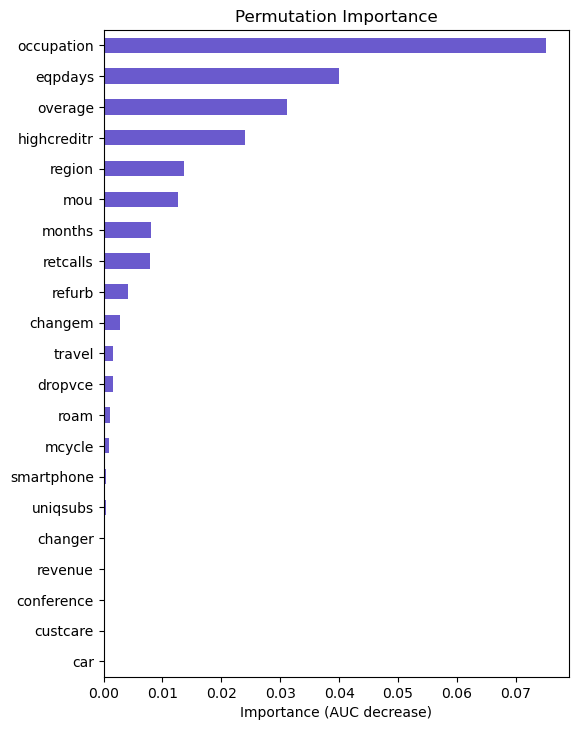

In [13]:
top5_lrw = lrw.plot('vimp', ret=True).index[0:5]

In [14]:
top5_lrw

Index(['occupation', 'eqpdays', 'overage', 'highcreditr', 'region'], dtype='object')

The top 5 drivers of churn was what type of occupation users have, how old their current device is, how many minutes over their allocated plan did a consumer use, if they have high credit rating, and where they live in Singapore. 
* Overall, occupation seems to hold the highest variable importance, which is a customer characteristic.
* EQPDays is how old a device is. So people who remain on older phones will have a higher predicted probability of churn.
* Overage is how many minutes each person exceeds their allocated phone plan. This means that consumers will have to pay a penalty fee for exceeding their plan.
* High Credit rating is binary variable in which they are splitting each user on whether or not they have high credit rating.
* Region is based off of what region in Singapore do people live in as a categorical variable.

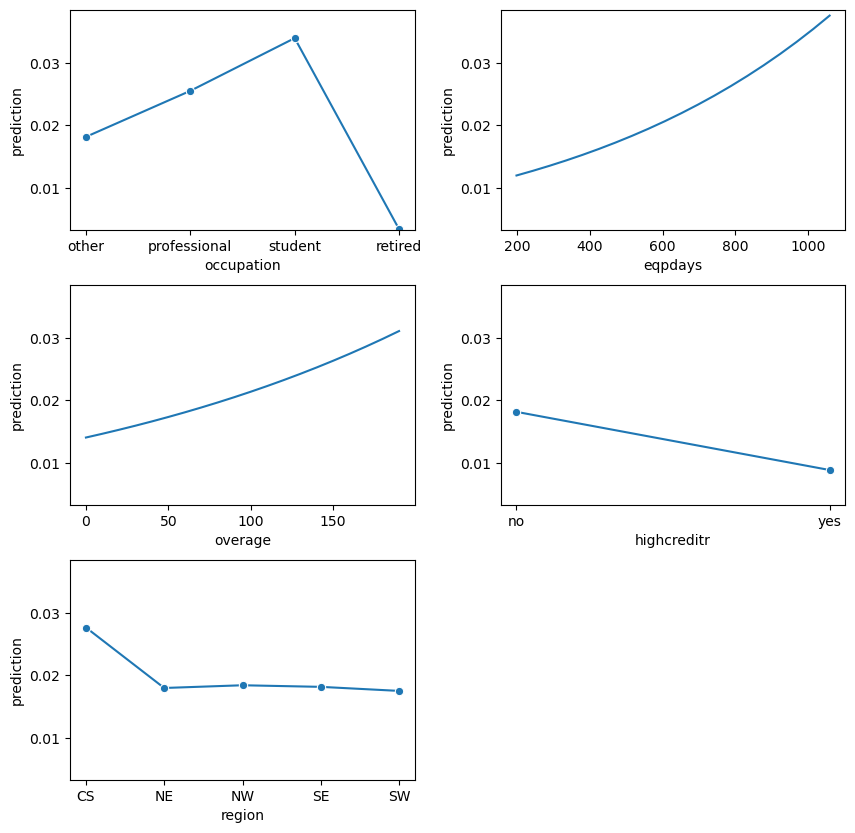

In [15]:
lrw.plot('pred', data=s_mobile[s_mobile.representative==1], incl=top5_lrw)

In [16]:
s_mobile[s_mobile.representative==1]['region'].value_counts(normalize=True)

region
SE    0.202133
NW    0.201533
SW    0.200933
CS    0.199233
NE    0.196167
Name: proportion, dtype: float64

* As per a the prediction plot, type of occupation seems to affect churn. Which students rank the top. We can believe that students have heavy usage, so perhaps students find mismatches between S Mobile and their current usage. So through cost effectiveness, they may change their plan. However, retirees rank dead last in terms of predicted probability of churn. This means is most likely due to the fact that retirees do not use their devices enough to find a need to change their phone plan. The issue is that you cannot make people retirees, so this characteristic is not actionable from a firm perspective. What they can do is make the plan more attractive to students by finding what their needs are and making the right match.
* For device age, we expect churn to be high for older devices as people find the reason to change. By finding a reason to replace their device, people perhaps find the needs to change their plan alongside it. So, S Mobile needs to find a way to keep people on new devices through incentives and ensure they have less reason to change companies.
* For overage, we believe that people who use their device beyond the allocated plan churn because the plan in this case is mismatch between consumer and firm. So in order to find a firm that more aptly fits their needs consumers will leave S Mobile.
* For high credit rating, we believe the people with lower credit rating a more financially irresponsible. So, it is more likely that they cannot afford the current plan they are on. But by creating a more financially friendly plan should be more attractive in terms of churn.
* As for region, we see that people in Central Singapore has a higher predicted probability of churn. Though there is no evidence of class imbalance, if anything, we see that we see a less fraction of people life in CS, there is special characteristic of people in CS that causes more churn. However, this feature is not actionable because you cannot show favoritism to certain region nor encourage people to move out of CS as a telecom company.

## Q3: Action per Variable Type

In [17]:
var5 = ['highcreditr', 'eqpdays', 'overage', 'dropvce', 'changem']

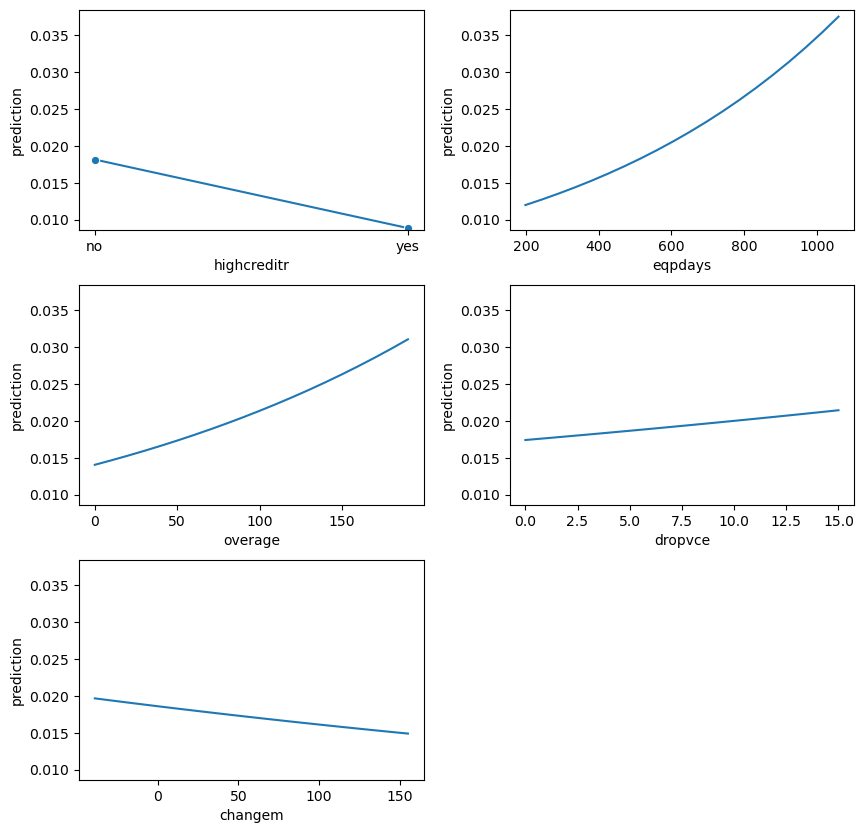

In [18]:
lrw.plot('pred', data=s_mobile[s_mobile.representative==1], incl=var5)

To select 5 actionable features to cover each variable type (yet still important variables), we selected credit rating, device age, overage, dropped calls, and minutes change as our variables.
* High credit rating is a customer feature that is still hard to create action on. However, there are methods to make having higher credit rating more attractive for consumers. Overall, having high credit is not a bad characteristic to have for any individual. It means that they are practicing economic responsibility. By creating incentives as a telecom company to have higher credit rating via discounts relative to credit score, they can first reduce churn. Moreover, they can have secondary effects of creating an economically strong consumer base that they can extract more revenues with more expensive phone plans.
* For device age, we see that greater the device age, more likely the churn. So the firm can create methods of keeping people on newer phones via trade in programs to create economically attractive situations for churn. People most likely find a reason to change companies along with their device. Hence, you can sure people stay with S Mobile by creating incentives for loyalty.
* For overage, you can simply ensure people do not have overage by two ways. First is by upping the limit on calls across the board. However, this may require infrastructure investment to accommodate increase in usage by consumers. Alternatively, we can offer discounted rates to plan switching. Based off of the person, there may be a mismatch between their current plan and usage habits. So, by allowing people to upgrade their plan leads to greater revenue and less overage penalties being distributed to others.
* For dropped calls, it is a generally a simple solution; that is to improve their infrastructure. This means that nobody will be suffering from dropped calls. But it means that there must be investment to create this change. If the firm is not willing to invest that heavily to ensure no dropped calls occur, they can do it so there is only 2-5 dropped calls on average.
* For change in minutes, we see a positive change to mean their usage in the current month exceeded the prior. But the fact that these people usage greater means they have the capacity and then satisfaction with their current plan. However, those who are negative or closer to zero, we can expect a plan mismatch. So, it is most likely that these people are overspending on their current plan, which creates the need to leave S Mobile. As a targeting scheme, you can create incentives of a discounted plan switch to those who are decreasing their usage.

## Q4: Impact of Churn (Logit)

### Credit Rating (Customer Characteristic)

In [19]:
s_mobile['churn_yes'] = (s_mobile.churn == 'yes').astype(int)
s_mobile_rep = s_mobile.query('representative == 1').copy()

s_mobile_rep['p_credit_high'] = lrw.predict(s_mobile_rep.assign(highcreditr='yes'))['prediction']


In [20]:
s_mobile_rep.loc[s_mobile_rep.highcreditr != 'yes', ['churn_yes', 'p_credit_high']].agg(
    ['count', 'mean']
).round(4)

,churn_yes,p_credit_high
count,24487.0000,24487.0000
mean,0.0223,0.0108


### EQPDays (Equipment Characteristic)

In [21]:
min_eqpdays = 365 * 1

s_mobile_rep['p_eqp_min'] = lrw.predict(s_mobile_rep.assign(eqpdays=min_eqpdays))['prediction']
s_mobile_rep.loc[s_mobile_rep.eqpdays > min_eqpdays, ['churn_yes', 'p_eqp_min']].agg(['count', 'mean']).round(4)

,churn_yes,p_eqp_min
count,21881.0000,21881.0000
mean,0.0231,0.0158


### Overage (Customer Usage)

In [22]:
min_overage = 0

s_mobile_rep['p_overage_min'] = lrw.predict(s_mobile_rep.assign(overage=0))['prediction']
s_mobile_rep.loc[s_mobile_rep.overage > min_overage, ['churn_yes', 'p_overage_min']].agg(['count', 'mean']).round(4)

,churn_yes,p_overage_min
count,16264.0000,16264.0000
mean,0.0243,0.0139


In [23]:
(s_mobile_rep.overage > 0).mean()


0.5421333333333334

### Dropvce (Quality)

In [24]:
min_dropvce = 0

s_mobile_rep['p_dropvce_min'] = lrw.predict(s_mobile_rep.assign(dropvce=min_dropvce))['prediction']
s_mobile_rep.loc[s_mobile_rep.dropvce > min_dropvce, ['churn_yes', 'p_dropvce_min']].agg(['count', 'mean']).round(4)

,churn_yes,p_dropvce_min
count,21234.0000,21234.0000
mean,0.0189,0.0184


### ChangeM (Usage Trend)

In [25]:
max_changem = 0

s_mobile_rep['p_changem_max'] = lrw.predict(s_mobile_rep.assign(changem=max_changem))['prediction']
s_mobile_rep.loc[s_mobile_rep.changem < max_changem, ['churn_yes', 'p_changem_max']].agg(['count', 'mean']).round(4)

,churn_yes,p_changem_max
count,14905.0000,14905.0000
mean,0.0221,0.0204


## Q5 Decide Offers

### Discount to Credit Rate Improvers

Here we can implement plan discounts to those who submit improved credit reports from their last submission. Overall, they can push this offer to anyone who does not have a high credit rating. There is an expected decrease of churn of 2.23 to 1.08 percent under the case that everybody who did not have a high credit score took the effort to improve their credit.

### Discount to People's Old Devices

Here was can see implement a plan discount through a trade-in program. It is said in the prediction plots that the older a person's device is, they are more likely to churn. Therefore, being able to keep a person on a "fresher" device is beneficial to the firm. We can set this line at 1 Year, as most phone companies release new devices on a yearly basis. Through these efforts, we can expect a decrease in churn to 1.58 percent if all individuals with 1 year + phones take the transition to a newer device.

### Increasing Usage Limits

Similar to device age, we see that people who have high values for overage will lead to greater churn. In other words, we believe that people who churn have "bad" phone plan fits. Then we as a firm can increase usage limits for all consumers across the board. So if nobody has issues with overage, you can expect decrease of churn to 1.39 percent. The only problem is if the phone lines have the capacity to handle all the increase in usage limits if people are aware that they are allowed to use more than they can before.

### Improving Call Quality

As for call quality, we expect that if people experience poor phone connections, there is greater likelihood of churn. So if the firm makes an investment to improve their phone lines, they can expect churn to decrease. However, there is only an decrease to a mere 1.84 percent from 1.89 percent. It is questionable for a firm to investment in improved phone lines if there is a sub 0.1 percent difference in churn.

### Perfect Plan to Those With Negative Usage Variation

We see that if people do not change their habits aggressively, they are greater targets for churn. Hence, the firm can be more creative in how they create and price their plans. Some examples are pay as you go plans, or the opportunity to change plans on a monthly basis. Being able to find right fits to consumers may be good for people are under using their plans. The targeting basis can be people who have negative  percent change in usage. This results in a decrease in churn from 2.21 to 2.04 percent in churn.

## Q6: CLV Calcuations

In [26]:
import numpy as np

### baseline

In [27]:
annual_growth = 0.15
annual_discount_rate = 0.125
monthly_discount_rate = (1 + annual_discount_rate) ** (1 / 12) - 1
monthly_churn = 0.02
cost_service = 0.3
marketing_cost = 0
nr_years = 5
nr_months = 5 * 12

In [28]:
time = np.array(range(0, nr_months)) + 1
growth = np.power(1 + annual_growth, range(0, nr_years))
growth = np.repeat(growth, 12, axis=0)
average_monthly_revenue = s_mobile_rep["revenue"].mean()
revenues = np.repeat(average_monthly_revenue, nr_months) * growth
service = cost_service * revenues
marketing = revenues * marketing_cost
profit = revenues - service - marketing

active = (1 - monthly_churn) ** time
active = np.power(1 - monthly_churn, time)
active_avg = (active + rsm.lag(active, fill=1)) / 2
exp_profit = active_avg * profit
PV_exp_profit = exp_profit / np.power(1 + monthly_discount_rate, time)
CLV = np.cumsum(PV_exp_profit)

s_mobile_clv = pd.DataFrame({"time": time, "active": (100 * active_avg).round(2).astype(str), "CLV": CLV})
s_mobile_clv.round(2)

,time,active,CLV
0,1,99.0,38.86
1,2,97.02,76.58
2,3,95.08,113.18
3,4,93.18,148.70
4,5,91.31,183.16
5,6,89.49,216.61
6,7,87.7,249.07
7,8,85.94,280.57
8,9,84.23,311.14
9,10,82.54,340.80


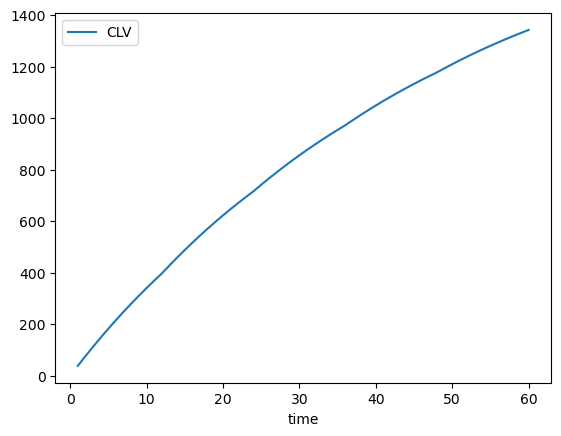

In [29]:
fig = s_mobile_clv.plot.line(x="time", y="CLV")

### Credit Rating (Customer Characteristic)

High-credit customers (yes) have a lower churn probability than low-credit customers (no). Lower-credit customers may struggle to pay bills, increasing churn. High-credit customers may get better offers elsewhere, but they tend to stay longer. Therefore, loyalty perks for high-credit customers (discounts, premium support) may help keep them longer.

In [30]:
monthly_churn_credit = s_mobile_rep.loc[s_mobile_rep.highcreditr != 'yes', ['churn_yes', 'p_credit_high']].agg(
    ['count', 'mean']
).round(4).loc['mean', 'p_credit_high'] * 1.25
marketing_cost_credit = marketing_cost + 0.02

Best to assume that not all people will commit, so churn is arbitrarily adjusted by 25 percent to be conservative.

In [31]:
average_monthly_revenue_credit = s_mobile_rep["revenue"].mean() * 0.95
revenues_credit = np.repeat(average_monthly_revenue_credit, nr_months) * growth
service_credit = cost_service * revenues_credit
marketing_credit = revenues_credit * marketing_cost_credit
profit_credit = revenues_credit - service_credit - marketing_credit

active_credit = (1 - monthly_churn_credit) ** time
active_credit = np.power(1 - monthly_churn_credit, time)
active_avg_credit = (active_credit + rsm.lag(active_credit, fill=1)) / 2
exp_profit_credit = active_avg_credit * profit_credit
PV_exp_profit_credit = exp_profit_credit / np.power(1 + monthly_discount_rate, time)
CLV_credit = np.cumsum(PV_exp_profit_credit)

s_mobile_credit = pd.DataFrame({"time": time, "active_credit": (100 * active_avg_credit).round(2).astype(str), "CLV_credit": CLV_credit})
s_mobile_credit.round(2)


,time,active_credit,CLV_credit
0,1,99.32,35.98
1,2,97.98,71.14
2,3,96.66,105.47
3,4,95.36,139.02
4,5,94.07,171.79
5,6,92.8,203.80
6,7,91.55,235.07
7,8,90.31,265.61
8,9,89.09,295.45
9,10,87.89,324.60


In [32]:
s_mobile_clv = s_mobile_clv.merge(s_mobile_credit, on="time").round(2).reset_index(drop=True)
s_mobile_clv

,time,active,CLV,active_credit,CLV_credit
0,1,99.0,38.86,99.32,35.98
1,2,97.02,76.58,97.98,71.14
2,3,95.08,113.18,96.66,105.47
3,4,93.18,148.70,95.36,139.02
4,5,91.31,183.16,94.07,171.79
5,6,89.49,216.61,92.8,203.80
6,7,87.7,249.07,91.55,235.07
7,8,85.94,280.57,90.31,265.61
8,9,84.23,311.14,89.09,295.45
9,10,82.54,340.80,87.89,324.60


### EQPDays (Equipment Characteristic)

Churn probability increases as eqpdays (number of days owning the current handset) increases. Customers with older phones are more likely to leave. Customers with older devices may switch carriers to get a new phone.Therefore, offering handset upgrade discounts can help reduce churn.

In [33]:
monthly_churn_eqp = s_mobile_rep.loc[s_mobile_rep.eqpdays > min_eqpdays, ['churn_yes', 'p_eqp_min']].agg(['count', 'mean']).round(4).loc['mean', 'p_eqp_min'] * 1.10
marketing_cost_eqp = marketing_cost + 0.04

Here we adjust churn by 10 percent, to be conservative again. Not everyone will take the trade in deal.

In [34]:
marketing_eqp = revenues * marketing_cost_eqp
profit_eqp = revenues - service - marketing_eqp

active_eqp = (1 - monthly_churn_eqp) ** time
active_eqp = np.power(1 - monthly_churn_eqp, time)
active_avg_eqp = (active_eqp + rsm.lag(active_eqp, fill=1)) / 2
exp_profit_eqp = active_avg_eqp * profit_eqp
PV_exp_profit_eqp = exp_profit_eqp / np.power(1 + monthly_discount_rate, time)
CLV_eqp = np.cumsum(PV_exp_profit_eqp) - 400 # one-time trade-in cost


s_mobile_eqp = pd.DataFrame({"time": time, "active_eqp": (100 * active_avg_eqp).round(2).astype(str), "CLV_eqp": CLV_eqp})
s_mobile_eqp.round(2)


,time,active_eqp,CLV_eqp
0,1,99.13,-363.31
1,2,97.41,-327.61
2,3,95.72,-292.87
3,4,94.05,-259.06
4,5,92.42,-226.17
5,6,90.81,-194.17
6,7,89.23,-163.03
7,8,87.68,-132.73
8,9,86.16,-103.25
9,10,84.66,-74.56


In [35]:
s_mobile_clv = s_mobile_clv.merge(s_mobile_eqp, on="time").round(2).reset_index(drop=True)
s_mobile_clv

,time,active,CLV,active_credit,CLV_credit,active_eqp,CLV_eqp
0,1,99.0,38.86,99.32,35.98,99.13,-363.31
1,2,97.02,76.58,97.98,71.14,97.41,-327.61
2,3,95.08,113.18,96.66,105.47,95.72,-292.87
3,4,93.18,148.70,95.36,139.02,94.05,-259.06
4,5,91.31,183.16,94.07,171.79,92.42,-226.17
5,6,89.49,216.61,92.8,203.80,90.81,-194.17
6,7,87.7,249.07,91.55,235.07,89.23,-163.03
7,8,85.94,280.57,90.31,265.61,87.68,-132.73
8,9,84.23,311.14,89.09,295.45,86.16,-103.25
9,10,82.54,340.80,87.89,324.60,84.66,-74.56


### Overage (Customer Usage)

Churn probability increases as overage usage increases. Customers who exceed their plan limits and get charged extra tend to leave.Therefore, waiving overage fees or offering better plans can help reduce churn.

In [36]:
monthly_churn_over = s_mobile_rep.loc[s_mobile_rep.overage > min_overage, ['churn_yes', 'p_overage_min']].agg(['count', 'mean']).round(4).loc['mean', 'p_overage_min']
cost_service_over = cost_service + 0.1

In [37]:
average_monthly_revenue_over = s_mobile_rep["revenue"].mean() * 1.10
revenues_over = np.repeat(average_monthly_revenue_over, nr_months) * growth
service_over = cost_service_over * revenues_over
marketing_over = revenues_over * marketing_cost
profit_over = revenues_over - service_over - marketing_over

active_over = (1 - monthly_churn_over) ** time
active_over = np.power(1 - monthly_churn_over, time)
active_avg_over = (active_over + rsm.lag(active_over, fill=1)) / 2
exp_profit_over = active_avg_over * profit_over
PV_exp_profit_over = exp_profit_over / np.power(1 + monthly_discount_rate, time)
CLV_over = np.cumsum(PV_exp_profit_over)


s_mobile_over = pd.DataFrame({"time": time, "active_over": (100 * active_avg_over).round(2).astype(str), "CLV_over": CLV_over})
s_mobile_over.round(2)


,time,active_over,CLV_over
0,1,99.3,36.76
1,2,97.92,72.65
2,3,96.56,107.70
3,4,95.22,141.92
4,5,93.9,175.33
5,6,92.59,207.97
6,7,91.31,239.83
7,8,90.04,270.94
8,9,88.78,301.32
9,10,87.55,330.99


In [38]:
s_mobile_clv = s_mobile_clv.merge(s_mobile_over, on="time").round(2).reset_index(drop=True)
s_mobile_clv

,time,active,CLV,active_credit,CLV_credit,active_eqp,CLV_eqp,active_over,CLV_over
0,1,99.0,38.86,99.32,35.98,99.13,-363.31,99.3,36.76
1,2,97.02,76.58,97.98,71.14,97.41,-327.61,97.92,72.65
2,3,95.08,113.18,96.66,105.47,95.72,-292.87,96.56,107.70
3,4,93.18,148.70,95.36,139.02,94.05,-259.06,95.22,141.92
4,5,91.31,183.16,94.07,171.79,92.42,-226.17,93.9,175.33
5,6,89.49,216.61,92.8,203.80,90.81,-194.17,92.59,207.97
6,7,87.7,249.07,91.55,235.07,89.23,-163.03,91.31,239.83
7,8,85.94,280.57,90.31,265.61,87.68,-132.73,90.04,270.94
8,9,84.23,311.14,89.09,295.45,86.16,-103.25,88.78,301.32
9,10,82.54,340.80,87.89,324.60,84.66,-74.56,87.55,330.99


### Comparison Plots

<Axes: xlabel='time'>

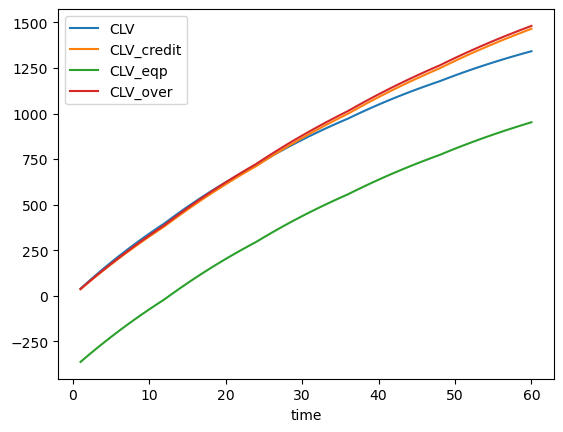

In [39]:
s_mobile_clv.plot.line(x="time", y=["CLV", "CLV_credit", "CLV_eqp", "CLV_over"])

* Under all the proposed churn reduction tactics, we see that overage elimination does the best. However, this view is slightly nuanced as this is simply done by eliminating overage for all individuals. If a program is created to eliminate overage, the data does not explicitly state how consumers will behave. Hence, it will be necessary to develop and experiment to observe consumers under a new policy. Moreover, implications of eliminating overage may come at a cost of improving phone lines which increases service costs. Though these estimations were created through increased service costs over time, the outlook may be different if there is one time cost for improving lines instead. 
* As a tactic, it is the easier to consider a trade-in program. This can be seen across many modern phone companies as people are allowed to replace their phones when new devices are released. As a scheme, it is generally hard to estimate how people will behave in face of this offer. So just a rough estimate, you can consider a present value discounted cost of devices in an attempt to mimic how people will act. Though it may take time for the scheme to become effective, at some point in time, the CLV of a person with lower churn will turn out to be effective.
* One of the hardest schemes to implement is on credit rates. In general, you cannot make people financially responsible over a night. However, by considering new churn through discount based incentives, it may be possible to increase revenue by having a financially stronger customer base. But it worth noting, that estimations become harder to project when customer characteristics are attempted to be changed.

Overall, the easiest programs are by improving client side service through trade-ins or elimination of overage. However, as it is harder to generally assume human behavior, it is necessary to run experiments to see how people react to certain incentives and it is necessary to understand how much cost structure changes because of these incentives.

# XGBoosting

## Q1: Model Development

In [40]:
cv_file = "cv_objects/xg_clf-cross-validation-object.pkl"
xg_cv = rsm.load_state(cv_file)['cv']
best_xg_params = xg_cv.best_params_
best_xg_params, xg_cv.best_score_

({'learning_rate': 0.2,
  'max_depth': 3,
  'min_child_weight': 7,
  'n_estimators': 250},
 0.7536068510244336)

In [41]:
best_xg = rsm.model.xgboost(
    data={'smobile_1M': s_mobile_1M.query('training==1')},
    evar=evar,
    rvar=rvar,
    lev='yes',
    n_jobs=-1,
    **best_xg_params
)
best_xg.summary()

XGBoost
Data                 : smobile_1M
Response variable    : churn
Level                : yes
Explanatory variables: changer, changem, revenue, mou, overage, roam, conference, months, uniqsubs, custcare, retcalls, dropvce, eqpdays, refurb, smartphone, highcreditr, mcycle, car, travel, region, occupation
Model type           : classification
Nr. of features      : (21, 28)
Nr. of observations  : 682,500
n_estimators         : 250
max_depth            : 3
min_child_weight     : 7
learning_rate        : 0.2
subsample            : 1.0
colsample_bytree     : 1.0
random_state         : 1234
AUC                  : 0.792
Extra arguments      : n_jobs=-1

Estimation data      :
 changer  changem  revenue  mou  overage  roam  conference  months  uniqsubs  custcare  retcalls  dropvce  eqpdays  refurb_yes  smartphone_yes  highcreditr_yes  mcycle_yes  car_yes  travel_yes  region_CS  region_NE  region_NW  region_SE  region_SW  occupation_other  occupation_professional  occupation_student  occupa

In [42]:
s_mobile_1M['pred_xg'] = best_xg.predict(s_mobile_1M)['prediction']

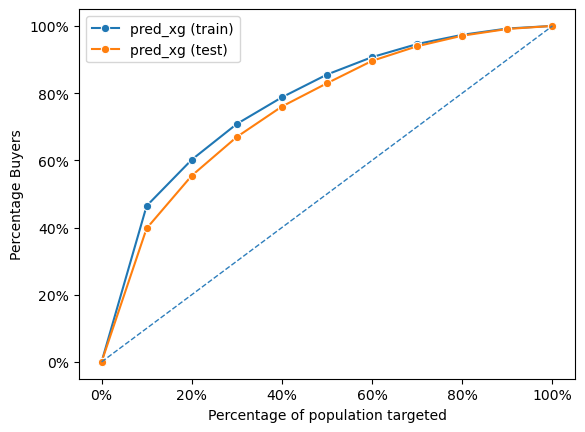

In [43]:
dct = {
    'train': s_mobile_1M[s_mobile_1M.training==1],
    'test': s_mobile_1M[s_mobile_1M.training==0]
}
fig = rsm.gains_plot(dct, rvar=rvar, lev='yes', pred='pred_xg')

## Q2: Main Drivers of Churn

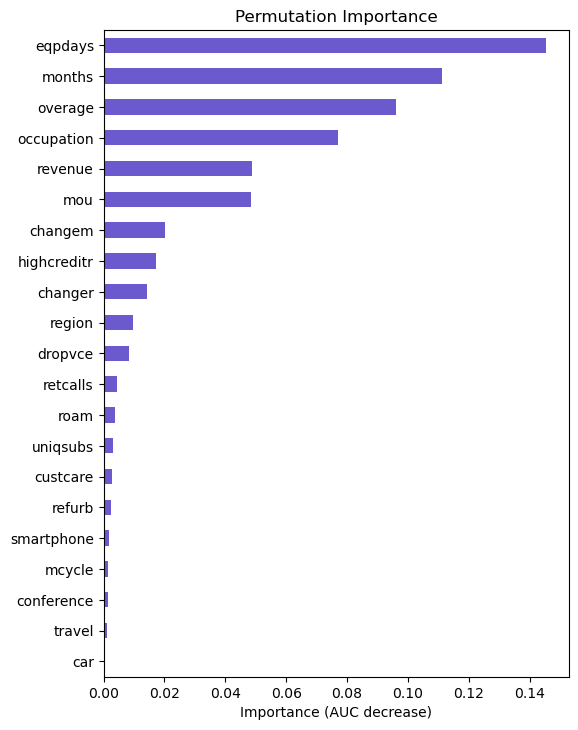

In [44]:
top5_xgb = best_xg.plot('vimp', ret=True).index[0:5]

Based on the XGBoost model, the top churn drivers include EQPDays (device age), months (tenure), overage (exceeding allocated plan), occupation, and revenue.
 Device age (EQPDays) is the strongest predictor, indicating that customers with older devices are more likely to churn, suggesting that a device upgrade incentive could help retain them. 
 
 Subscription length (months) shows that newer customers tend to leave more frequently, highlighting the need for early-stage engagement strategies such as onboarding bonuses. 
 
 Overage usage suggests that customers exceeding their plan limits may face high fees, making them more likely to leave, so introducing flexible data or voice limit extensions could mitigate churn. 
 
 Occupation plays a crucial role in churn prediction, indicating that certain job types may be more price-sensitive or have varying service needs, which could inform customized retention plans.
 
  Revenue as a churn driver suggests that high-paying customers might expect premium service, and offering exclusive perks or discounts could enhance retention. 






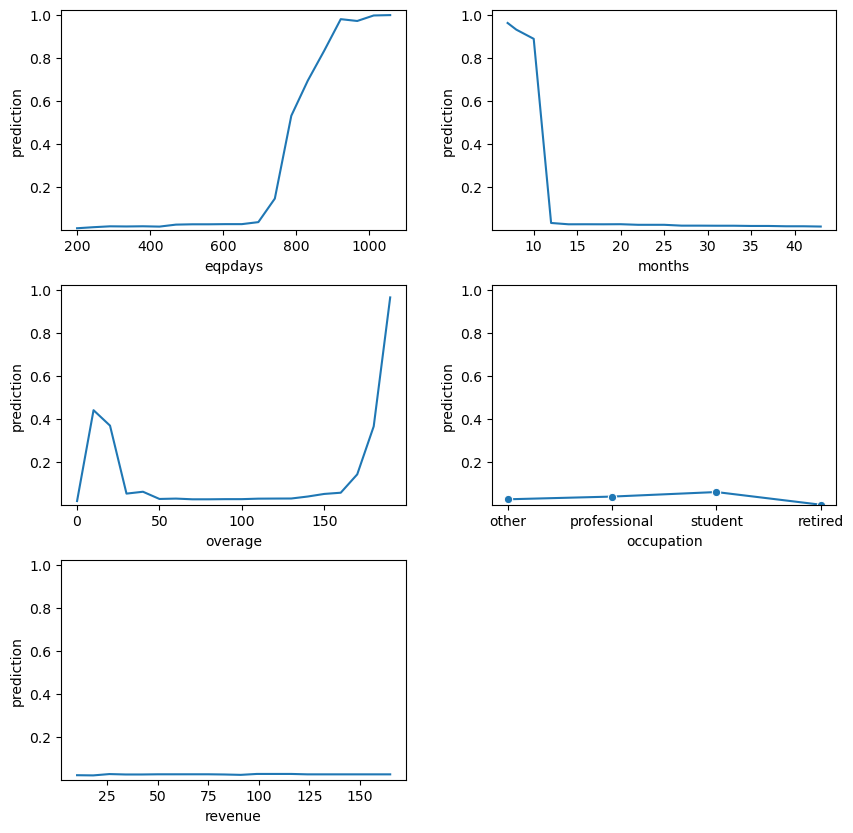

In [45]:
best_xg.plot('pred', data=s_mobile_1M, incl=top5_xgb)

## Q3: Action per Variable Type

In [46]:
var5_xg = ['eqpdays', 'highcreditr', 'dropvce', 'changem', 'months']

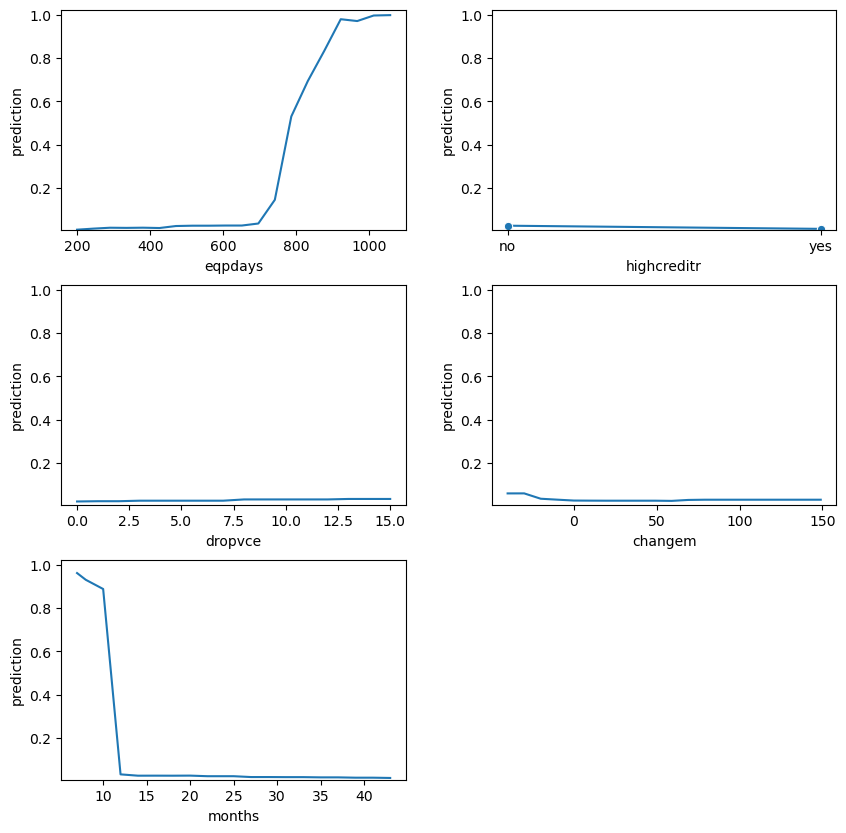

In [47]:
best_xg.plot('pred', data=s_mobile_1M, incl=var5_xg)

The XGBoost model highlights device age (EQPDays), credit rating (highcreditr), dropped calls (dropvce), usage trend (changem), and subscription length (months) as the top churn drivers. Examining the plots provides deeper insights into customer behavior and effective retention strategies.

From the EQPDays graph, we see that as device age exceeds 600 days, churn probability rises sharply, reaching nearly 100% at around 1,000 days. This suggests that customers with older devices are much more likely to leave. To counter this, S-Mobile should introduce a trade-in program or device upgrade discounts for customers who have used the same phone for over two years.

The credit rating (highcreditr) plot shows a clear separation between customers with high and low credit ratings, where those with low credit scores have significantly higher churn probabilities. This indicates that financial concerns may be driving their decisions. Offering credit-based discounts, flexible payment options, or targeted financing plans could improve retention among this group.

The dropped calls (dropvce) graph shows that customers with higher dropped call counts (above 5) exhibit an increased churn probability. While the increase is not as steep as device age, it still suggests that poor call quality negatively impacts retention. S-Mobile should focus on network optimization in high-drop areas, offering service credits or compensatory data for affected users.

For usage trends (changem), the model suggests that customers with declining usage are at higher risk of churning. The churn probability is relatively stable, but a noticeable increase occurs for those with major usage reductions. To address this, S-Mobile can introduce flexible plans, data rollover options, or personalized offers to customers showing a decrease in activity.

Lastly, the subscription length (months) plot reveals a drastic drop in churn probability after the first 12 months, indicating that newer customers are at the highest risk of leaving. This emphasizes the need for early engagement strategies, such as onboarding incentives, special discounts, or loyalty rewards, to encourage long-term commitment.

## Q4: Impact of Churn (XGBoost)

In [48]:
s_mobile_1M['churn_yes'] = (s_mobile_1M.churn == 'yes').astype(int)

### EQPDays (Equipment Characteristic)

In [49]:
min_eqpdays = 365

s_mobile_1M['p_eqp_min_xg'] = best_xg.predict(s_mobile_1M.assign(eqpdays=min_eqpdays))['prediction']
s_mobile_1M.loc[s_mobile_1M.eqpdays > min_eqpdays, ['churn_yes', 'p_eqp_min_xg']].agg(['count', 'mean']).round(4)

,churn_yes,p_eqp_min_xg
count,733173.0000,733173.0000
mean,0.0223,0.0179


### High Credit (Customer Characteristic)

In [50]:
s_mobile_1M['p_highcreditr_xg'] = best_xg.predict(s_mobile_1M.assign(highcreditr='yes'))['prediction']
s_mobile_1M.loc[s_mobile_1M.highcreditr != 'yes', ['churn_yes', 'p_highcreditr_xg']].agg(['count', 'mean']).round(4)

,churn_yes,p_highcreditr_xg
count,824939.0000,824939.0000
mean,0.0221,0.0123


### Months (Customer Usage)

In [51]:
max_months = 24

s_mobile_1M['p_months_max_xg'] = best_xg.predict(s_mobile_1M.assign(months=max_months))['prediction']
s_mobile_1M.loc[s_mobile_1M.months < max_months, ['churn_yes', 'p_months_max_xg']].agg(['count', 'mean']).round(4)

,churn_yes,p_months_max_xg
count,736247.00,736247.000
mean,0.02,0.018


### Dropvce (Quality)

In [52]:
min_dropvce = 0

s_mobile_1M['p_dropvce_min_xg'] = best_xg.predict(s_mobile_1M.assign(dropvce=min_dropvce))['prediction']
s_mobile_1M.loc[s_mobile_1M.dropvce > min_dropvce, ['churn_yes', 'p_dropvce_min_xg']].agg(['count', 'mean']).round(4)

,churn_yes,p_dropvce_min_xg
count,713288.0000,713288.0000
mean,0.0194,0.0188


### ChangeM (Usage Trend)

In [53]:
max_changem = 0

s_mobile_1M['p_changem_max_xg'] = best_xg.predict(s_mobile_1M.assign(changem=max_changem))['prediction']
s_mobile_1M.loc[s_mobile_1M.changem < max_changem, ['churn_yes', 'p_changem_max_xg']].agg(['count', 'mean']).round(4)

,churn_yes,p_changem_max_xg
count,497416.0000,497416.0000
mean,0.0219,0.0187


## Q5 Decide Offers

### Device Upgrade Discount (EQPDays)
For device upgrades, the XGBoost model shows that customers using phones older than 12 months have a higher churn probability (2.23%). Offering a trade-in program, installment plans, and discounted new devices can encourage them to stay, reducing churn to 1.79%. Providing timely device refreshes aligns with industry trends and keeps users engaged.
### Loyalty Rewards (Months)
For loyalty rewards, customers with over 24 months of tenure already have lower churn rates (2.00%), but further incentives can enhance retention. A tiered loyalty program with bonus data, bill discounts, and premium perks like entertainment bundles would strengthen engagement, decreasing churn to 1.80%. Long-term subscribers should feel valued and rewarded to prevent them from switching providers.
### Improve Call Quality (Dropvce)
For call quality improvements, the model indicates that customers experiencing frequent dropped calls are more likely to leave (1.94%). Enhancing network coverage, offering service credits for affected customers, and introducing a real-time complaint system can mitigate dissatisfaction, reducing churn to 1.88%. Reliable service is a key driver of retention, and proactive efforts to improve connectivity will reinforce customer trust.
### Flexible Usage Plans (ChangeM)
For flexible usage plans, users with highly fluctuating usage patterns tend to leave at higher rates (2.19%). Implementing adaptive plans that adjust based on usage trends, allowing one free plan switch per month, and introducing pay-as-you-go options can accommodate shifting customer needs, lowering churn to 1.87%. Providing more control over billing ensures customers find a plan that fits their changing habits.
### Credit Score-Based Incentives
For credit score-based incentives, customers who improve their credit scores show a natural decrease in churn risk. Offering tiered bill discounts, better financing options, and exclusive premium plan upgrades can encourage continued loyalty, moving churn from 2.21% to 1.23%. Recognizing financial responsibility fosters goodwill and long-term retention, particularly among customers seeking better value from their carrier.

## Q6: CLV Calculations

### Baseline

In [54]:
s_mobile_clv_xg = pd.DataFrame({"time": time, "active": (100 * active_avg).round(2).astype(str), "CLV": CLV})
s_mobile_clv_xg.round(2)

,time,active,CLV
0,1,99.0,38.86
1,2,97.02,76.58
2,3,95.08,113.18
3,4,93.18,148.70
4,5,91.31,183.16
5,6,89.49,216.61
6,7,87.7,249.07
7,8,85.94,280.57
8,9,84.23,311.14
9,10,82.54,340.80


### EQPDays Trade In Promo

Churn probability increases significantly as eqpdays increases. Since there is a sharp increase after ~800 days, it suggests that customers with older phones are much more likely to leave. Customers with older devices have a strong tendency to churn.Therefore, we decided to offer trade-in promotions and upgrade discounts.

In [55]:
monthly_churn_eqp_xg = (s_mobile_1M.loc[s_mobile_1M.eqpdays > min_eqpdays, ['churn_yes', 'p_eqp_min_xg']].agg(['count', 'mean']).round(4)).loc['mean', 'p_eqp_min_xg'] * 1.10
marketing_cost_eqp_xg = marketing_cost + 0.04

In [56]:
average_monthly_revenue_xg = s_mobile_1M["revenue"].mean()
revenues_xg = np.repeat(average_monthly_revenue_xg, nr_months) * growth
service_xg = cost_service * revenues_xg
marketing_eqp_xg = revenues_xg * marketing_cost_eqp_xg
profit_eqp_xg = revenues_xg - service_xg - marketing_eqp_xg

active_eqp_xg = (1 - monthly_churn_eqp_xg) ** time
active_eqp_xg = np.power(1 - monthly_churn_eqp_xg, time)
active_avg_eqp_xg = (active_eqp_xg + rsm.lag(active_eqp_xg, fill=1)) / 2
exp_profit_eqp_xg = active_avg_eqp_xg * profit_eqp_xg
PV_exp_profit_eqp_xg = exp_profit_eqp_xg / np.power(1 + monthly_discount_rate, time)
CLV_eqp_xg = np.cumsum(PV_exp_profit_eqp_xg) - 400


s_mobile_eqp_xg = pd.DataFrame({"time": time, "active_eqp_xg": (100 * active_avg_eqp_xg).round(2).astype(str), "CLV_eqp_xg": CLV_eqp_xg})
s_mobile_eqp_xg.round(2).tail(10)


,time,active_eqp_xg,CLV_eqp_xg
50,51,36.63,765.42
51,52,35.91,779.56
52,53,35.2,793.27
53,54,34.51,806.59
54,55,33.83,819.52
55,56,33.17,832.07
56,57,32.51,844.25
57,58,31.87,856.08
58,59,31.25,867.56
59,60,30.63,878.70


In [57]:
s_mobile_clv_xg = s_mobile_clv_xg.merge(s_mobile_eqp_xg, on="time").round(2).reset_index(drop=True)
s_mobile_clv_xg.tail(10)

,time,active,CLV,active_eqp_xg,CLV_eqp_xg
50,51,36.05,1224.23,36.63,765.42
51,52,35.33,1238.93,35.91,779.56
52,53,34.63,1253.20,35.2,793.27
53,54,33.93,1267.05,34.51,806.59
54,55,33.25,1280.49,33.83,819.52
55,56,32.59,1293.53,33.17,832.07
56,57,31.94,1306.19,32.51,844.25
57,58,31.3,1318.47,31.87,856.08
58,59,30.67,1330.39,31.25,867.56
59,60,30.06,1341.95,30.63,878.70


### ChangeM Discounts

From partial dependence plot, there is no strong trend. Only slight variations in churn probability. Change in usage patterns alone is not a strong predictor of churn. Better to focus on more direct factors like handset age or overage charges. However, it was still selected because it had the largest actual reduction in churn when interventions were applied.

In [58]:
monthly_churn_cgm = (s_mobile_1M.loc[s_mobile_1M.changem < max_changem, ['churn_yes', 'p_changem_max_xg']].agg(['count', 'mean']).round(4)).loc['mean', 'p_changem_max_xg']
marketing_cost_cgm = marketing_cost + 0.01

In [59]:
average_monthly_revenue_cgm = s_mobile_1M["revenue"].mean() * 0.95
revenues_cgm = np.repeat(average_monthly_revenue_cgm, nr_months) * growth
service_cgm = cost_service * revenues_cgm
marketing_cgm = revenues_cgm * marketing_cost_cgm
profit_cgm = revenues_cgm - service_cgm - marketing_cgm

active_cgm = (1 - monthly_churn_cgm) ** time
active_cgm = np.power(1 - monthly_churn_cgm, time)
active_avg_cgm = (active_cgm + rsm.lag(active_cgm, fill=1)) / 2
exp_profit_cgm = active_avg_cgm * profit_cgm
PV_exp_profit_cgm = exp_profit_cgm / np.power(1 + monthly_discount_rate, time)
CLV_cgm = np.cumsum(PV_exp_profit_cgm)


s_mobile_cgm = pd.DataFrame({"time": time, "active_cgm": (100 * active_avg_cgm).round(2).astype(str), "CLV_cgm": CLV_cgm})
s_mobile_cgm.round(2).tail(10)


,time,active_cgm,CLV_cgm
50,51,38.55,1183.06
51,52,37.83,1197.85
52,53,37.12,1212.22
53,54,36.43,1226.18
54,55,35.75,1239.74
55,56,35.08,1252.92
56,57,34.42,1265.73
57,58,33.78,1278.18
58,59,33.15,1290.27
59,60,32.53,1302.03


In [60]:
s_mobile_clv_xg = s_mobile_clv_xg.merge(s_mobile_cgm, on="time").round(2).reset_index(drop=True)
s_mobile_clv_xg.tail(10)

,time,active,CLV,active_eqp_xg,CLV_eqp_xg,active_cgm,CLV_cgm
50,51,36.05,1224.23,36.63,765.42,38.55,1183.06
51,52,35.33,1238.93,35.91,779.56,37.83,1197.85
52,53,34.63,1253.20,35.2,793.27,37.12,1212.22
53,54,33.93,1267.05,34.51,806.59,36.43,1226.18
54,55,33.25,1280.49,33.83,819.52,35.75,1239.74
55,56,32.59,1293.53,33.17,832.07,35.08,1252.92
56,57,31.94,1306.19,32.51,844.25,34.42,1265.73
57,58,31.3,1318.47,31.87,856.08,33.78,1278.18
58,59,30.67,1330.39,31.25,867.56,33.15,1290.27
59,60,30.06,1341.95,30.63,878.70,32.53,1302.03


### High Credit Rating Promo

Churn probability is lower for customers with high credit ratings (yes). Customers with good credit are less likely to churn. These customers may leave for better deals elsewhere, so loyalty perks and VIP offers can help retain them.

In [61]:
monthly_churn_hcr = (s_mobile_1M.loc[s_mobile_1M.highcreditr != 'yes', ['churn_yes', 'p_highcreditr_xg']].agg(['count', 'mean']).round(4)).loc['mean', 'p_highcreditr_xg'] * 1.25
marketing_cost_hcr = marketing_cost + 0.02

Adjust the churn here slightly to make sure estimates are conservative.

In [62]:
average_monthly_revenue_hcr = s_mobile_1M["revenue"].mean() * 0.95
revenues_hcr = np.repeat(average_monthly_revenue_hcr, nr_months) * growth
service_hcr = cost_service * revenues_hcr
marketing_hcr = revenues_hcr * marketing_cost_hcr
profit_hcr = revenues_hcr - service_hcr - marketing_hcr

active_hcr = (1 - monthly_churn_hcr) ** time
active_hcr = np.power(1 - monthly_churn_hcr, time)
active_avg_hcr = (active_hcr + rsm.lag(active_hcr, fill=1)) / 2
exp_profit_hcr = active_avg_hcr * profit_hcr
PV_exp_profit_hcr = exp_profit_hcr / np.power(1 + monthly_discount_rate, time)
CLV_hcr = np.cumsum(PV_exp_profit_hcr)


s_mobile_hcr = pd.DataFrame({"time": time, "active_hcr": (100 * active_avg_hcr).round(2).astype(str), "CLV_hcr": CLV_hcr})
s_mobile_hcr.round(2).tail(10)


,time,active_hcr,CLV_hcr
50,51,45.73,1256.52
51,52,45.03,1273.87
52,53,44.33,1290.78
53,54,43.65,1307.26
54,55,42.98,1323.34
55,56,42.32,1339.01
56,57,41.67,1354.29
57,58,41.03,1369.19
58,59,40.4,1383.72
59,60,39.78,1397.89


In [63]:
s_mobile_clv_xg = s_mobile_clv_xg.merge(s_mobile_hcr, on="time").round(2).reset_index(drop=True)
s_mobile_clv_xg.tail(10)

,time,active,CLV,active_eqp_xg,CLV_eqp_xg,active_cgm,CLV_cgm,active_hcr,CLV_hcr
50,51,36.05,1224.23,36.63,765.42,38.55,1183.06,45.73,1256.52
51,52,35.33,1238.93,35.91,779.56,37.83,1197.85,45.03,1273.87
52,53,34.63,1253.20,35.2,793.27,37.12,1212.22,44.33,1290.78
53,54,33.93,1267.05,34.51,806.59,36.43,1226.18,43.65,1307.26
54,55,33.25,1280.49,33.83,819.52,35.75,1239.74,42.98,1323.34
55,56,32.59,1293.53,33.17,832.07,35.08,1252.92,42.32,1339.01
56,57,31.94,1306.19,32.51,844.25,34.42,1265.73,41.67,1354.29
57,58,31.3,1318.47,31.87,856.08,33.78,1278.18,41.03,1369.19
58,59,30.67,1330.39,31.25,867.56,33.15,1290.27,40.4,1383.72
59,60,30.06,1341.95,30.63,878.70,32.53,1302.03,39.78,1397.89


### Comparison Plots

<Axes: xlabel='time'>

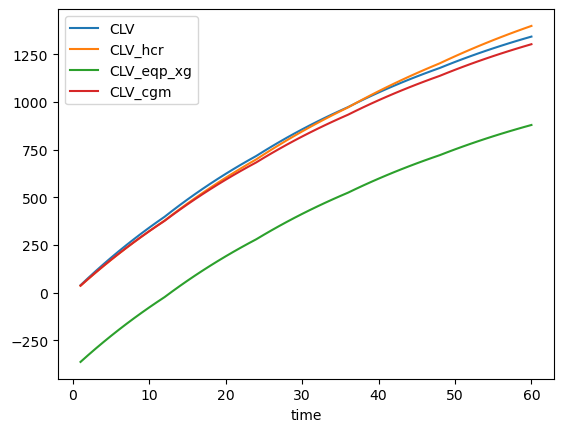

In [64]:
s_mobile_clv_xg.plot.line(x="time", y=["CLV", "CLV_hcr", "CLV_eqp_xg", "CLV_cgm"])

* As a tactic, we see that credit rating discount incentives perform the best. However, it is extremely hard to implement this tactic because you cannot change customer characteristics overnight. Nevertheless, it may be a valid reason to see if you can increase revenue through credit improvement schemes as it may be creating a stronger customer base in the future.
* As for trade-in schemes, it should be noted that it may be hard to constantly make sure people are motivated to trade in their devices constantly over every year. Alternatively, it is hard to estimate out a cost if you are not sure how people will behave across 60 months. By taking a discounted average in the beginning, we can simulate out a 1 time instance of a trade in through conservative means. Overall, we see that keeping people on newer devices will ensure churn will be lower and CLV can be increased over a longer period of time.
* As for monthly changes in usage. It is possible to create campaigns that ensure people are getting right plans when they have negative change. However, this means that these people are subject to lower potential revenue. Though the financial metrics are strong, we are not sure how it will play out in a longer period. Will there be a large decrease in revenue that effects CLV and are there any unforeseen costs that is associated with this move.

Seen in the logit case, it should be well founded that trade-in campaigns are the easier to create because the reality of the scheme. People can take advantage of newer devices because they are getting it a fraction of the cost. But the only thing is that it is hard to understand when and how people react to trade-in schemes. So just creating a general average is the best you can do. Nevertheless, it is best to set up an experiment to see how many people will react to the offer and will it affect churn that way we expect it.